<a href="https://colab.research.google.com/github/YasminForestti/Processo-seletivo-Analytica-2022/blob/main/an%C3%A1lise_dos_grupo_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1)** Importação das bibliotecas e definições de escalas de cores:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import seaborn as sns

In [3]:
colors=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
colors2= ["#577590","#43aa8b","#90be6d","#f9c74f","#f8961e","#f3722c","#f94144"]

In [4]:
grupo_lgbtqia = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/grupo_lgbtqia.csv")

In [5]:
grupo_lgbtqia.head()

,ano,grupo,homicidios,prop_homicidios_total
0,2020,Gay,51.0,NaN
1,2020,Trans ou Travesti,164.0,NaN
2,2020,Travesti,NaN,NaN
3,2020,Lésbica,10.0,NaN
4,2020,Transsexual,NaN,NaN


##**2)** Tratamento dos dados

Na tabela, são recorrente os grupos Gay, Trans ou Travesti, Travesti, Lésbica e Transsexual. Apesar de a identidade Transsexual diferir da Travesti, ambas se categorizam como Transgênero. Assim, os grupos Trans ou Travesti, Travesti e Transsexual foram agrupados no grupo "Trans".

In [6]:
Replace_mapping_dict = {
    'Travesti':'Trans',
    'Transsexual':'Trans',
    'Trans ou Travesti':'Trans'
}

grupo_lgbtqia['grupo']=grupo_lgbtqia['grupo'].replace(Replace_mapping_dict)

##**3)** Subnoitificação

Contabilizei os anos em que cada grupo não obtinha informação, ou seja, em que o número de homicídios era NaN. 

In [7]:
filtro =  np.invert(grupo_lgbtqia['homicidios'] >= 0)
grupo_NaN = grupo_lgbtqia[filtro]
grupo_NaN = grupo_NaN.groupby(by = ['grupo','ano']).sum()
grupo_NaN = grupo_NaN.drop(columns = ['homicidios','prop_homicidios_total'])
grupo_NaN

Empty DataFrame
Columns: []
Index: [(Bissexual, 2015), (Gay, 2015), (Lésbica, 2015), (Trans, 2011), (Trans, 2012), (Trans, 2013), (Trans, 2014), (Trans, 2015), (Trans, 2016), (Trans, 2017), (Trans, 2018), (Trans, 2020)]

Aqui, percebi que há muito mais anos que não houve a notificação de homicídios de pessoas Trans em relação aos outros grupos.

##**4)** Homicídio por grupo

Text(0.5, 1.0, 'Grupos da comunidade LGBT mortos por ano')

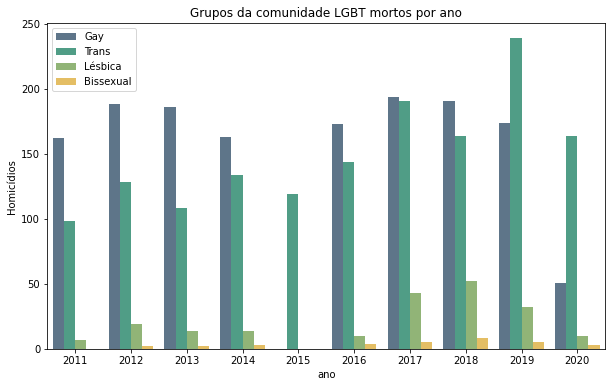

In [8]:
plt.figure(figsize=(10, 6))
plot_abaixo_sm = sns.barplot(x = 'ano',
                             y='homicidios',
                             data=grupo_lgbtqia,
                             hue='grupo', estimator=np.sum, ci=None, palette=colors2)
plt.legend(["Gay","Trans", "Lésbica","Bissexual"])
plt.ylabel("Homicídios")
plt.title("Grupos da comunidade LGBT mortos por ano")

In [9]:
filtro = grupo_lgbtqia['homicidios'] > 0
grupo_lgbtqia = grupo_lgbtqia[filtro]
grupo_soma_homicidios = grupo_lgbtqia.groupby(by = 'grupo').sum()

In [10]:
grupo_soma_homicidios= grupo_soma_homicidios.drop(columns = ['ano','prop_homicidios_total'])
grupo_soma_homicidios

,homicidios
grupo,
Bissexual,32.0
Gay,1482.0
Lésbica,201.0
Trans,1489.0


tabela com o total de homicídios de 2011 a 2020 as 4 grupos.

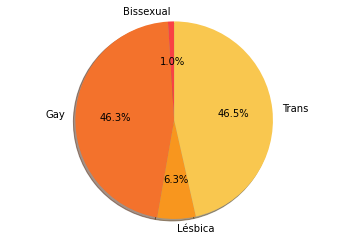

In [11]:
labels = ['Bissexual', 'Gay','Lésbica','Trans']
tam = grupo_soma_homicidios['homicidios'].tolist()
ax = plt.subplot()
ax.pie(tam,labels=labels,autopct = '%1.1f%%',startangle = 90,colors=colors,shadow = True)
ax.axis('equal')
plt.show()